## **Projecto 1:** Construção de um Pipeline de Dados Simples para Análise de Logs de Servidor Web

In [82]:
# importando as biblotecas
import re
import pandas as pd
import requests as rqts

# **Extract**(Extração)

In [83]:
# Extrair os dados de um servidor
with open(r"ArquivosLogs/server_example.log") as file_log:
    log = file_log.readlines()
print(log)

['203.0.113.10 - - [17/Apr/2025:01:17:15 +0000] "DELETE /login HTTP/1.1" 301 1391\n', '192.168.1.1 - - [17/Apr/2025:01:16:45 +0000] "GET /login HTTP/1.1" 403 4938\n', '203.0.113.10 - - [17/Apr/2025:01:16:15 +0000] "POST /logout HTTP/1.1" 400 3976\n', '192.168.1.1 - - [17/Apr/2025:01:15:45 +0000] "POST /login HTTP/1.1" 500 950\n', '192.168.1.1 - - [17/Apr/2025:01:15:15 +0000] "DELETE /api/data HTTP/1.1" 200 1292\n', '8.8.8.8 - - [17/Apr/2025:01:14:45 +0000] "DELETE /index.html HTTP/1.1" 200 2767\n', '172.16.0.3 - - [17/Apr/2025:01:14:15 +0000] "GET /login HTTP/1.1" 404 1685\n', '203.0.113.10 - - [17/Apr/2025:01:13:45 +0000] "PUT /api/data HTTP/1.1" 400 4291\n', '172.16.0.3 - - [17/Apr/2025:01:13:15 +0000] "DELETE /dashboard HTTP/1.1" 404 2320\n', '192.168.1.1 - - [17/Apr/2025:01:12:45 +0000] "PUT /index.html HTTP/1.1" 404 2060\n', '8.8.8.8 - - [17/Apr/2025:01:12:15 +0000] "POST /login HTTP/1.1" 400 246\n', '192.168.1.1 - - [17/Apr/2025:01:11:45 +0000] "PUT /index.html HTTP/1.1" 200 1629

In [84]:
type(log)

list

# **Transform(Transformação)**

In [85]:
padrao =r'(\d+\.\d+\.\d+\.\d+).*?\[(.*?)\] "(.*?)" (\d+) (\d+)'
data = []
id = 1
for cada_log in log:
    
    match = re.match(padrao, cada_log)
    data.append({
        "ID":id,
        "Endereço Ip": match.group(1),
        "Data_hora":match.group(2),
        "Requisição":match.group(3),
        "Status code": int(match.group(4)),
        "Bytes": int(match.group(5))

    })
    id+=1

df = pd.DataFrame(data)
df['Data_hora'] = pd.to_datetime(df['Data_hora'], format='%d/%b/%Y:%H:%M:%S %z') # dia/mes/hora:minuto:segunto fuso
df['Data_hora'] = df['Data_hora'].dt.tz_localize(None)# removendo o fuso
df.head()


,ID,Endereço Ip,Data_hora,Requisição,Status code,Bytes
0,1,203.0.113.10,2025-04-17 01:17:15,DELETE /login HTTP/1.1,301,1391
1,2,192.168.1.1,2025-04-17 01:16:45,GET /login HTTP/1.1,403,4938
2,3,203.0.113.10,2025-04-17 01:16:15,POST /logout HTTP/1.1,400,3976
3,4,192.168.1.1,2025-04-17 01:15:45,POST /login HTTP/1.1,500,950
4,5,192.168.1.1,2025-04-17 01:15:15,DELETE /api/data HTTP/1.1,200,1292


In [86]:
# Separando as coluna data
df["Hora"] = df.Data_hora.dt.time
df["Data"] = df.Data_hora.dt.date

df.head()

,ID,Endereço Ip,Data_hora,Requisição,Status code,Bytes,Hora,Data
0,1,203.0.113.10,2025-04-17 01:17:15,DELETE /login HTTP/1.1,301,1391,01:17:15,2025-04-17
1,2,192.168.1.1,2025-04-17 01:16:45,GET /login HTTP/1.1,403,4938,01:16:45,2025-04-17
2,3,203.0.113.10,2025-04-17 01:16:15,POST /logout HTTP/1.1,400,3976,01:16:15,2025-04-17
3,4,192.168.1.1,2025-04-17 01:15:45,POST /login HTTP/1.1,500,950,01:15:45,2025-04-17
4,5,192.168.1.1,2025-04-17 01:15:15,DELETE /api/data HTTP/1.1,200,1292,01:15:15,2025-04-17


In [87]:
# verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           100 non-null    int64         
 1   Endereço Ip  100 non-null    object        
 2   Data_hora    100 non-null    datetime64[ns]
 3   Requisição   100 non-null    object        
 4   Status code  100 non-null    int64         
 5   Bytes        100 non-null    int64         
 6   Hora         100 non-null    object        
 7   Data         100 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 6.4+ KB


In [88]:
df[['Método', 'Recurso', 'Protocolo']] = df['Requisição'].str.split(' ', expand=True)
df

,ID,Endereço Ip,Data_hora,Requisição,Status code,Bytes,Hora,Data,Método,Recurso,Protocolo
0,1,203.0.113.10,2025-04-17 01:17:15,DELETE /login HTTP/1.1,301,1391,01:17:15,2025-04-17,DELETE,/login,HTTP/1.1
1,2,192.168.1.1,2025-04-17 01:16:45,GET /login HTTP/1.1,403,4938,01:16:45,2025-04-17,GET,/login,HTTP/1.1
2,3,203.0.113.10,2025-04-17 01:16:15,POST /logout HTTP/1.1,400,3976,01:16:15,2025-04-17,POST,/logout,HTTP/1.1
3,4,192.168.1.1,2025-04-17 01:15:45,POST /login HTTP/1.1,500,950,01:15:45,2025-04-17,POST,/login,HTTP/1.1
4,5,192.168.1.1,2025-04-17 01:15:15,DELETE /api/data HTTP/1.1,200,1292,01:15:15,2025-04-17,DELETE,/api/data,HTTP/1.1
...,...,...,...,...,...,...,...,...,...,...,...
95,96,192.168.1.1,2025-04-17 00:29:45,PUT /login HTTP/1.1,500,3875,00:29:45,2025-04-17,PUT,/login,HTTP/1.1
96,97,172.16.0.3,2025-04-17 00:29:15,POST /login HTTP/1.1,400,4071,00:29:15,2025-04-17,POST,/login,HTTP/1.1
97,98,203.0.113.10,2025-04-17 00:28:45,POST /login HTTP/1.1,500,2374,00:28:45,2025-04-17,POST,/login,HTTP/1.1
98,99,192.168.1.1,2025-04-17 00:28:15,GET /index.html HTTP/1.1,403,986,00:28:15,2025-04-17,GET,/index.html,HTTP/1.1


In [89]:
#Organizando os dados
df = df[["ID", "Endereço Ip","Data","Hora", "Data_hora",'Método', 'Recurso', 'Protocolo', "Status code", "Bytes"]]
df

,ID,Endereço Ip,Data,Hora,Data_hora,Método,Recurso,Protocolo,Status code,Bytes
0,1,203.0.113.10,2025-04-17,01:17:15,2025-04-17 01:17:15,DELETE,/login,HTTP/1.1,301,1391
1,2,192.168.1.1,2025-04-17,01:16:45,2025-04-17 01:16:45,GET,/login,HTTP/1.1,403,4938
2,3,203.0.113.10,2025-04-17,01:16:15,2025-04-17 01:16:15,POST,/logout,HTTP/1.1,400,3976
3,4,192.168.1.1,2025-04-17,01:15:45,2025-04-17 01:15:45,POST,/login,HTTP/1.1,500,950
4,5,192.168.1.1,2025-04-17,01:15:15,2025-04-17 01:15:15,DELETE,/api/data,HTTP/1.1,200,1292
...,...,...,...,...,...,...,...,...,...,...
95,96,192.168.1.1,2025-04-17,00:29:45,2025-04-17 00:29:45,PUT,/login,HTTP/1.1,500,3875
96,97,172.16.0.3,2025-04-17,00:29:15,2025-04-17 00:29:15,POST,/login,HTTP/1.1,400,4071
97,98,203.0.113.10,2025-04-17,00:28:45,2025-04-17 00:28:45,POST,/login,HTTP/1.1,500,2374
98,99,192.168.1.1,2025-04-17,00:28:15,2025-04-17 00:28:15,GET,/index.html,HTTP/1.1,403,986


# Geocalizar um endereço Ip

In [90]:
dados_ip = []
for ips in df["Endereço Ip"].values:
    url = f"http://ip-api.com/json/{ips}"
    resposta = rqts.get(url= url)
    d = resposta.json()
    dados_ip.append(d)
dados_ip = pd.DataFrame(dados_ip)


In [91]:
dados_ip

,status,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as,query,message
0,success,United States,US,NY,New York,New York,000000,40.7127,-74.0059,America/New_York,TEST-NET-3,TEST-NET-3 RFC5737,,203.0.113.10,NaN
1,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.1.1,private range
2,success,United States,US,NY,New York,New York,000000,40.7127,-74.0059,America/New_York,TEST-NET-3,TEST-NET-3 RFC5737,,203.0.113.10,NaN
3,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.1.1,private range
4,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.1.1,private range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.1.1,private range
96,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.16.0.3,private range
97,success,United States,US,NY,New York,New York,000000,40.7127,-74.0059,America/New_York,TEST-NET-3,TEST-NET-3 RFC5737,,203.0.113.10,NaN
98,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.1.1,private range


In [92]:
dados_ip.columns

Index(['status', 'country', 'countryCode', 'region', 'regionName', 'city',
       'zip', 'lat', 'lon', 'timezone', 'isp', 'org', 'as', 'query',
       'message'],
      dtype='object')

In [93]:
#apagando algumas colunas irrelevantes
d = dados_ip.drop(columns=['status','zip', 'lat', 'lon', 'timezone', 'isp', 'org', 'as'], inplace=True)
d

In [94]:
df2 = pd.merge(df, dados_ip, left_on='Endereço Ip', right_on='query')    
df2.head()

,ID,Endereço Ip,Data,Hora,Data_hora,Método,Recurso,Protocolo,Status code,Bytes,country,countryCode,region,regionName,city,query,message
0,1,203.0.113.10,2025-04-17,01:17:15,2025-04-17 01:17:15,DELETE,/login,HTTP/1.1,301,1391,United States,US,NY,New York,New York,203.0.113.10,NaN
1,1,203.0.113.10,2025-04-17,01:17:15,2025-04-17 01:17:15,DELETE,/login,HTTP/1.1,301,1391,United States,US,NY,New York,New York,203.0.113.10,NaN
2,1,203.0.113.10,2025-04-17,01:17:15,2025-04-17 01:17:15,DELETE,/login,HTTP/1.1,301,1391,United States,US,NY,New York,New York,203.0.113.10,NaN
3,1,203.0.113.10,2025-04-17,01:17:15,2025-04-17 01:17:15,DELETE,/login,HTTP/1.1,301,1391,United States,US,NY,New York,New York,203.0.113.10,NaN
4,1,203.0.113.10,2025-04-17,01:17:15,2025-04-17 01:17:15,DELETE,/login,HTTP/1.1,301,1391,United States,US,NY,New York,New York,203.0.113.10,NaN


In [95]:
df2.drop(columns=['query'], inplace=True)

In [96]:
df_final = df2[["ID","Endereço Ip", "country", "countryCode", "regionName", "city", "Data_hora","Data", "Hora",'Método', 'Recurso', 'Protocolo', "Status code", "Bytes"]]
df_final


,ID,Endereço Ip,country,countryCode,regionName,city,Data_hora,Data,Hora,Método,Recurso,Protocolo,Status code,Bytes
0,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
1,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
2,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
3,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
4,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,100,8.8.8.8,United States,US,Virginia,Ashburn,2025-04-17 00:27:45,2025-04-17,00:27:45,PUT,/index.html,HTTP/1.1,400,2707
2042,100,8.8.8.8,United States,US,Virginia,Ashburn,2025-04-17 00:27:45,2025-04-17,00:27:45,PUT,/index.html,HTTP/1.1,400,2707
2043,100,8.8.8.8,United States,US,Virginia,Ashburn,2025-04-17 00:27:45,2025-04-17,00:27:45,PUT,/index.html,HTTP/1.1,400,2707
2044,100,8.8.8.8,United States,US,Virginia,Ashburn,2025-04-17 00:27:45,2025-04-17,00:27:45,PUT,/index.html,HTTP/1.1,400,2707


In [97]:
# Renomeando algumas colunas
df_final.rename(columns={"country": "País", "countryCode": "Código do País", "regionName": "Região", "city": "Cidade"}, inplace=True)
df_final

/tmp/ipykernel_6592/659914724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={"country": "País", "countryCode": "Código do País", "regionName": "Região", "city": "Cidade"}, inplace=True)


,ID,Endereço Ip,País,Código do País,Região,Cidade,Data_hora,Data,Hora,Método,Recurso,Protocolo,Status code,Bytes
0,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
1,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
2,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
3,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
4,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,100,8.8.8.8,United States,US,Virginia,Ashburn,2025-04-17 00:27:45,2025-04-17,00:27:45,PUT,/index.html,HTTP/1.1,400,2707
2042,100,8.8.8.8,United States,US,Virginia,Ashburn,2025-04-17 00:27:45,2025-04-17,00:27:45,PUT,/index.html,HTTP/1.1,400,2707
2043,100,8.8.8.8,United States,US,Virginia,Ashburn,2025-04-17 00:27:45,2025-04-17,00:27:45,PUT,/index.html,HTTP/1.1,400,2707
2044,100,8.8.8.8,United States,US,Virginia,Ashburn,2025-04-17 00:27:45,2025-04-17,00:27:45,PUT,/index.html,HTTP/1.1,400,2707


# **Load(carregamento)**

In [98]:
# Salvando o arquivo em vsv
df_final.to_csv("log_site_vendas.csv", sep=";", index=False)

In [99]:
# Salvando em sql
from sqlalchemy import create_engine
from sqlalchemy.dialects.mysql import VARCHAR
# Fazendo a connection
usuario = "root"
senha = "kingson1976"
host = "localhost"
port = "3306"
nome_do_banco = "log_site_vendas"
engine = create_engine(f'mysql+pymysql://{usuario}:{senha}@{host}/{nome_do_banco}')


In [100]:
# salvando numa base de dados
df_final.to_sql('logs', con=engine, if_exists='replace', index=False, dtype={"Região": VARCHAR(255, charset='utf8mb4')})

2046

# Fazendo algumas analises

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("log_site_vendas.csv", sep=";")
df.head()

,ID,Endereço Ip,País,Código do País,Região,Cidade,Data_hora,Data,Hora,Método,Recurso,Protocolo,Status code,Bytes
0,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
1,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
2,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
3,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391
4,1,203.0.113.10,United States,US,New York,New York,2025-04-17 01:17:15,2025-04-17,01:17:15,DELETE,/login,HTTP/1.1,301,1391


# Recursos mais acessados

/tmp/ipykernel_6592/1472879486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Recurso', order=recursos, palette='Set2')


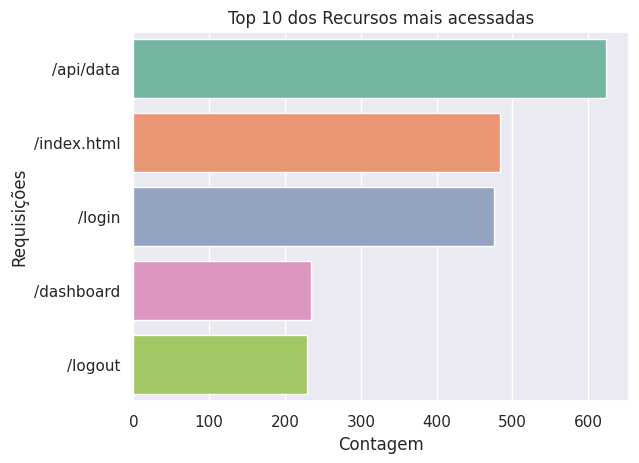

In [103]:
# Recursos mais acessados
recursos = df['Recurso'].value_counts().index[:10]
sns.set_theme()
sns.countplot(data=df, y='Recurso', order=recursos, palette='Set2')
plt.title("Top 10 dos Recursos mais acessadas")
plt.xlabel("Contagem")
plt.ylabel("Requisições")
plt.show()

# Os horários de pico de acesso

In [104]:
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S').dt.hour
horarioDepico = df.groupby('Hora').size().reset_index(name='Total_acessos')
horasDepico = horarioDepico.sort_values(by='Total_acessos', ascending=False)
horarioDepico = horarioDepico.iloc[0]

print(f"Horário de pico: {horarioDepico['Hora']}h com {horarioDepico['Total_acessos']} acessos")

Horário de pico: 0h com 1337 acessos


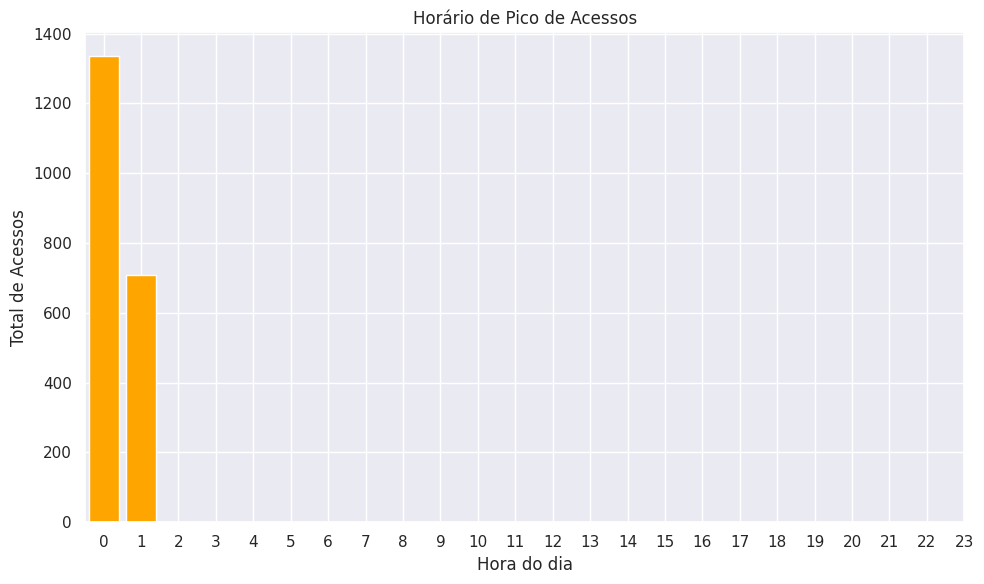

In [105]:
sns.set_theme()
plt.figure(figsize=(10, 6))
plt.bar(horasDepico['Hora'], horasDepico['Total_acessos'], color='orange')
plt.xlabel('Hora do dia')
plt.ylabel('Total de Acessos')
plt.title('Horário de Pico de Acessos')
plt.xticks(range(0, 24)) 
plt.tight_layout()
plt.show()

# Distribuição dos Status Codes

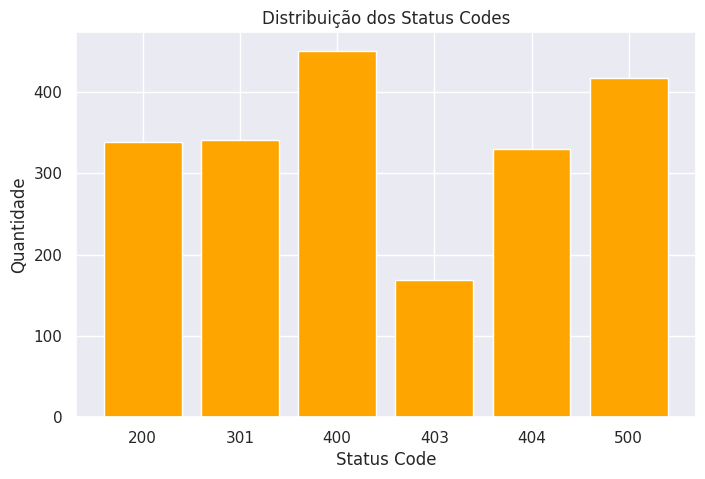

In [106]:
statusCode = df['Status code'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(statusCode.index.astype(str), statusCode.values, color='orange')
plt.xlabel('Status Code')
plt.ylabel('Quantidade')
plt.title('Distribuição dos Status Codes')
plt.show()